In [1]:
import os
import random
import numpy as np
import tensorflow as tf

SEED=42
os.environ["PYTHONHASHSEED"]=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

# GPU 설정
gpus=tf.config.experimental.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

2025-06-15 22:27:28.925626: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-15 22:27:29.406362: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-15 22:27:29.406443: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-15 22:27:29.487628: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-15 22:27:29.663636: I tensorflow/core/platform/cpu_feature_guar

In [2]:
X=np.load("../../data/processed/03_AIHUB_dataset/X_eye.npy")  # (N, 40, 80, 1)
Y=np.load("../../data/processed/03_AIHUB_dataset/y_eye.npy")  # (N, 1)

# train/val split
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val=train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=SEED)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model=Sequential([
    Conv2D(32, 3, activation="relu", input_shape=(40, 80, 1)),
    MaxPooling2D(2),
    Conv2D(64, 3, activation="relu"),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

2025-06-15 22:28:19.948333: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-15 22:28:19.948423: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-15 22:28:19.948460: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-15 22:28:20.191884: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-15 22:28:20.191941: I external/local_xla/xla/stream_executor

In [4]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

esc=EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)
reduce_lr=ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=2, verbose=1)
checkpoint=ModelCheckpoint(filepath="temp_model/01_simple_cnn/best_model.keras",
                           monitor="val_loss", save_best_only=True, verbose=1)

history=model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=30,
                  callbacks=[esc, reduce_lr, checkpoint], verbose=1)

Epoch 1/30


2025-06-15 22:30:51.501101: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2025-06-15 22:30:51.803366: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:225] Falling back to the CUDA driver for PTX compilation; ptxas does not support CC 8.9
2025-06-15 22:30:51.803402: W external/local_xla/xla/stream_executor/gpu/asm_compiler.cc:228] Used ptxas at ptxas
2025-06-15 22:30:51.803460: W external/local_xla/xla/stream_executor/gpu/redzone_allocator.cc:322] UNIMPLEMENTED: ptxas ptxas too old. Falling back to the driver to compile.
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2025-06-15 22:30:52.398355: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kernel_to_blob_pass.cc:191] Failed to compile generated PTX with ptxas. Falling back to compilation by driver.
2025-06-15 22:30:52.529276: W tensorflow/compiler/mlir/tools/kernel_gen/transforms/gpu_kerne

2060/2060 [==============================] - ETA: 0s - loss: 0.6508 - accuracy: 0.7470
Epoch 1: val_loss improved from inf to 0.54653, saving model to temp_model/01_simple_cnn/best_model.keras
2060/2060 [==============================] - 17s 7ms/step - loss: 0.6508 - accuracy: 0.7470 - val_loss: 0.5465 - val_accuracy: 0.7474 - lr: 0.0010
Epoch 2/30
2056/2060 [============================>.] - ETA: 0s - loss: 0.4932 - accuracy: 0.7824
Epoch 2: val_loss improved from 0.54653 to 0.45166, saving model to temp_model/01_simple_cnn/best_model.keras
2060/2060 [==============================] - 13s 6ms/step - loss: 0.4932 - accuracy: 0.7824 - val_loss: 0.4517 - val_accuracy: 0.8047 - lr: 0.0010
Epoch 3/30
2055/2060 [============================>.] - ETA: 0s - loss: 0.4514 - accuracy: 0.8064
Epoch 3: val_loss did not improve from 0.45166
2060/2060 [==============================] - 13s 7ms/step - loss: 0.4514 - accuracy: 0.8064 - val_loss: 0.4623 - val_accuracy: 0.8015 - lr: 0.0010
Epoch 4/30
20

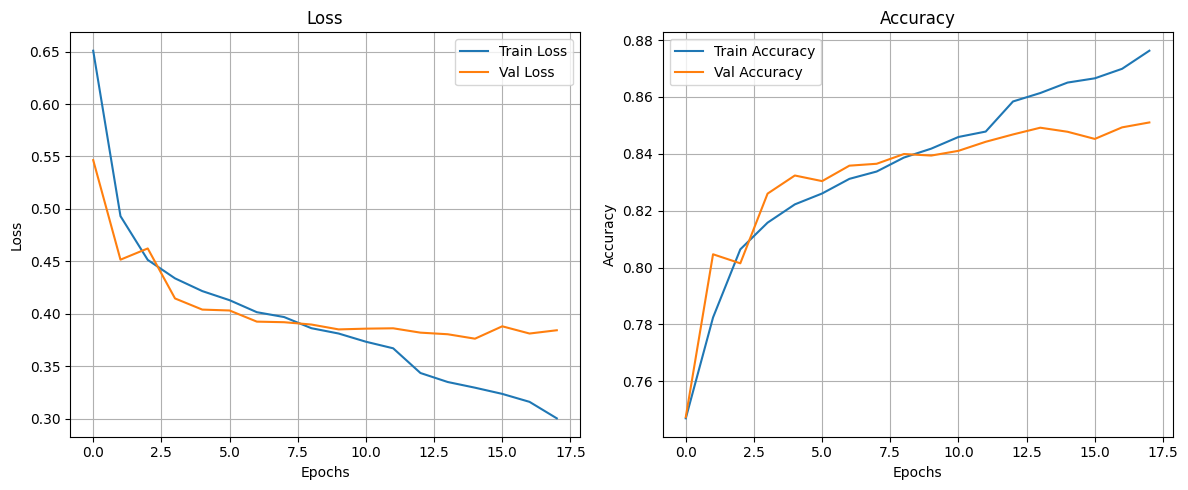

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# 최종 평가
loss, acc=model.evaluate(X_val, Y_val)
print(f"Val Loss: {loss:.4f}, Val Accuracy: {acc:.4f}")

1030/1030 [==============================] - 3s 3ms/step - loss: 0.3764 - accuracy: 0.8478
Val Loss: 0.3764, Val Accuracy: 0.8478
